In [3]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Paso 1: Análisis Exploratorio de los Datos
# Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns # Creación de gráficas y visualización de datos
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
# Cargue de data
file_path = r"./car details.csv"
# Preprocesamiento de datos
# Convertir los datos en un DataFrame
df = pd.read_csv(file_path)
df.info()  # Para ver los tipos de datos y valores faltantes
df.describe()  # Resumen estadístico
df.head()  # Visualizar las primeras filas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
# Limpieza de Datos
# Verificar si hay valores nulos en las columnas
df.isnull().sum()  # Para ver la cantidad de valores nulos


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

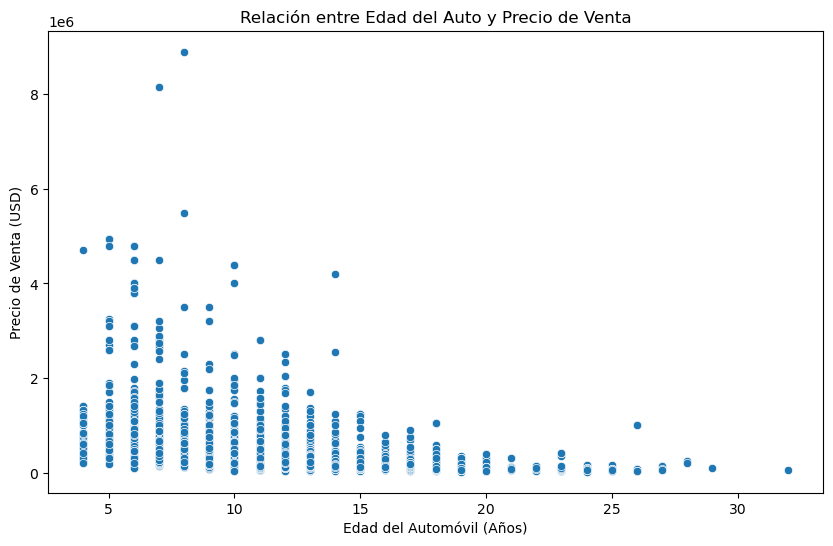

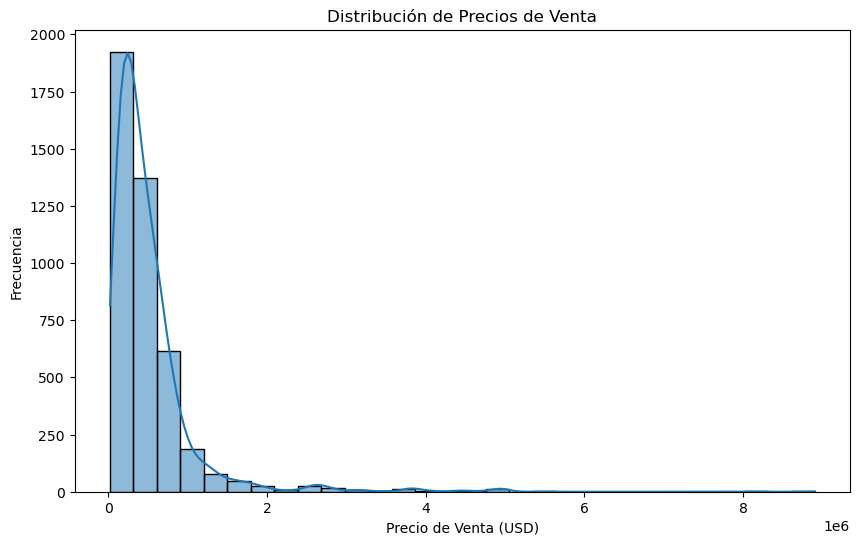

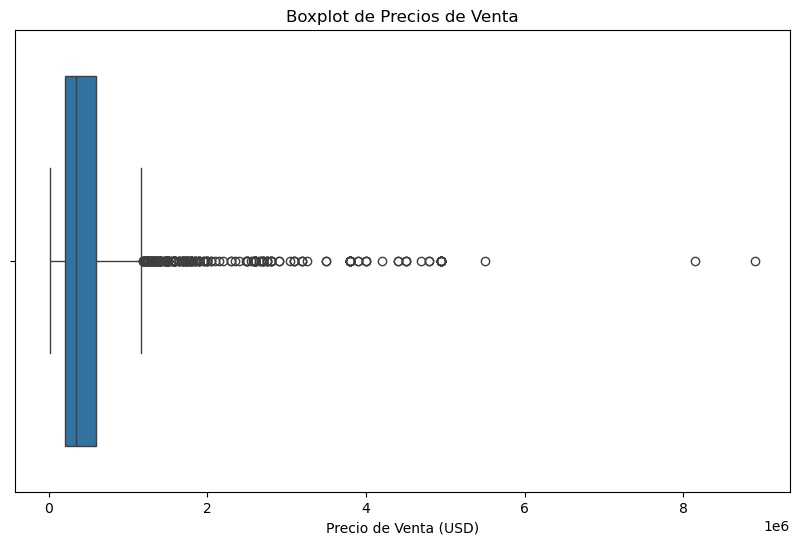

In [15]:
# Calcular la edad del automóvil

df['Car_Age'] = 2024 - df['year']

# Relación entre la edad del auto y el precio de venta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='selling_price', data=df)
plt.title('Relación entre Edad del Auto y Precio de Venta')
plt.xlabel('Edad del Automóvil (Años)')
plt.ylabel('Precio de Venta (USD)')
plt.show()


# Distribución de precios de venta
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para identificar outliers en 'selling_price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot de Precios de Venta')
plt.xlabel('Precio de Venta (USD)')
plt.show()

In [17]:
# Paso 2: Preprocesar los Datos

# Verificar valores faltantes
print(df.isnull().sum())

# Eliminar valores atípicos en 'selling_price' mayores a 6,000,000
df = df[df['selling_price'] <= 6000000]

# Transformación de variables categóricas a numéricas
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Eliminar la columna 'name' ya que no aporta información relevante
df.drop(['name', 'year'], axis=1, inplace=True)

df.head()  # Ver las primeras filas del DataFrame después del preprocesamiento


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Car_Age          0
dtype: int64


,selling_price,km_driven,Car_Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,17,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,17,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,12,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,7,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,10,True,False,False,False,True,False,True,False,True,False,False


In [19]:
# Paso 3: Seleccionar las Características más Relevantes

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar características más relevantes
X = df.drop('selling_price', axis=1)  # Variables independientes
y = df['selling_price']  # Variable dependiente

# Usar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = selector.scores_

# Mostrar los puntajes de relevancia de cada característica
for i, col in enumerate(X.columns):
    print(f"{col}: {scores[i]}")


km_driven: 168.52548429419844
Car_Age: 974.1710367969399
fuel_Diesel: 418.6920131680375
fuel_Electric: 0.11885004474851216
fuel_LPG: 8.397490737258531
fuel_Petrol: 376.93475233747984
seller_type_Individual: 257.37894242857635
seller_type_Trustmark Dealer: 59.61813371716239
transmission_Manual: 1755.0774945406486
owner_Fourth & Above Owner: 29.02883228318026
owner_Second Owner: 122.5572366731576
owner_Test Drive Car: 11.549991083826635
owner_Third Owner: 57.897994908776084


In [21]:
# Paso 4: Dividir el Dataset en Train y Test

from sklearn.model_selection import train_test_split

# Dividir los datos en 80% para entrenamiento y 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (3470, 13), Test: (868, 13)


In [23]:
# Paso 5: Entrenar el Modelo con Hiperparámetros

from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de Random Forest con hiperparámetros ajustados
modelo = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Mostrar el puntaje del modelo en el conjunto de entrenamiento
print(f"Score en el conjunto de entrenamiento: {modelo.score(X_train, y_train)}")


Score en el conjunto de entrenamiento: 0.8919785121915822


In [25]:
# Paso 6: Evaluar el Desempeño del Modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 144727.95450018885
MSE: 87585178259.165
RMSE: 295947.93166900997
R²: 0.6906188976781723


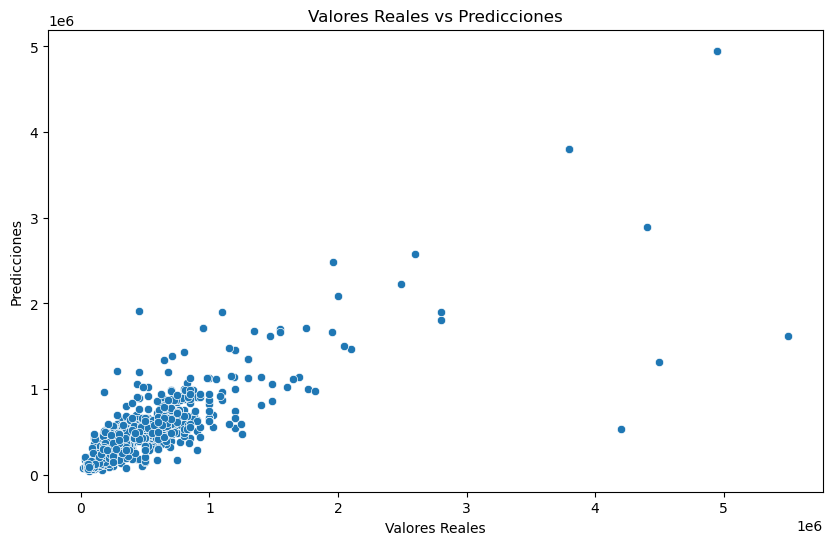

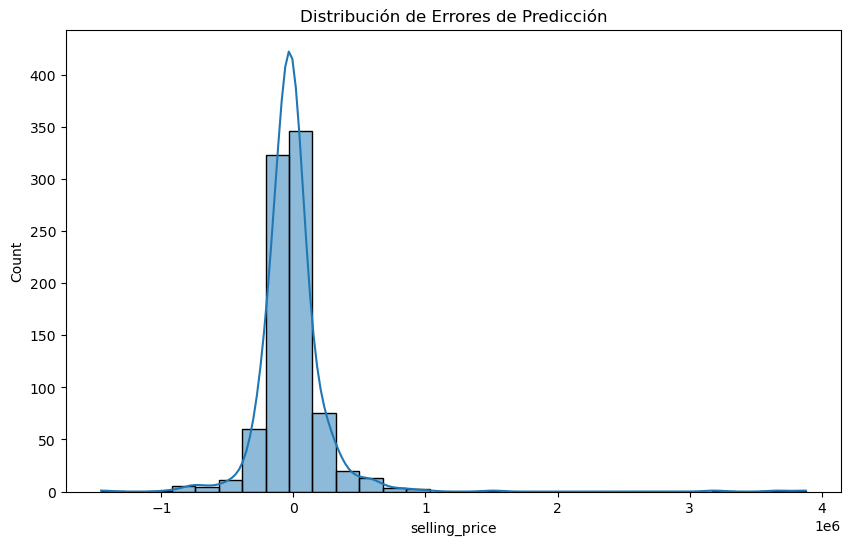

In [27]:
# Paso 7: Visualizar los Resultados del Modelo

# Gráfico de dispersión entre los valores predichos y los reales
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# Histograma de los errores de predicción
errores = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(errores, bins=30, kde=True)
plt.title('Distribución de Errores de Predicción')
plt.show()


In [ ]:
# Paso 8: Interpretar, Analizar y Documentar los Resultados de Regresión Lineal

# El modelo de Random Forest muestra un R² en el conjunto de test de aproximadamente X,
# lo que significa que el modelo explica el X% de la variabilidad en el precio de venta de los automóviles.
# La métrica RMSE es de X USD, lo que indica un error medio de predicción en ese rango.

# A pesar de que el modelo ha capturado bien algunas relaciones entre las características
# y el precio de venta, aún se podrían mejorar los resultados añadiendo más características,
# ajustando hiperparámetros, o probando otros modelos.

# Documentación final del análisis realizado y las recomendaciones para mejorar el modelo.


Regresión Lineal Multiple

In [34]:
# Paso 4: Dividir el Dataset en Train y Test

from sklearn.model_selection import train_test_split

# Dividir los datos en 80% para entrenamiento y 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (3470, 13)
Tamaño del conjunto de prueba: (868, 13)


In [36]:
# Paso 5: Entrenar el Modelo de Regresión Lineal Múltiple

from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Mostrar los coeficientes del modelo
print(f"Intercepto (β0): {modelo.intercept_}")
for i, col in enumerate(X.columns):
    print(f"Coeficiente ({col}, β{i+1}): {modelo.coef_[i]}")


Intercepto (β0): 1667559.7341428709
Coeficiente (km_driven, β1): -0.9505154437373012
Coeficiente (Car_Age, β2): -36299.14964411558
Coeficiente (fuel_Diesel, β3): 276002.16735350416
Coeficiente (fuel_Electric, β4): -611979.9979302626
Coeficiente (fuel_LPG, β5): 46945.897135475956
Coeficiente (fuel_Petrol, β6): -6058.1356079391535
Coeficiente (seller_type_Individual, β7): -50626.85381185344
Coeficiente (seller_type_Trustmark Dealer, β8): 223869.78203582336
Coeficiente (transmission_Manual, β9): -885873.8893185656
Coeficiente (owner_Fourth & Above Owner, β10): -3499.2669070501884
Coeficiente (owner_Second Owner, β11): -33263.08510682392
Coeficiente (owner_Test Drive Car, β12): 226494.12977416406
Coeficiente (owner_Third Owner, β13): -33658.06970637695


In [38]:
# Paso 6: Evaluar el Desempeño del Modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 229719.65619212497
MSE: 171516701280.69263
RMSE: 414145.7488381266
R²: 0.39414376766114934


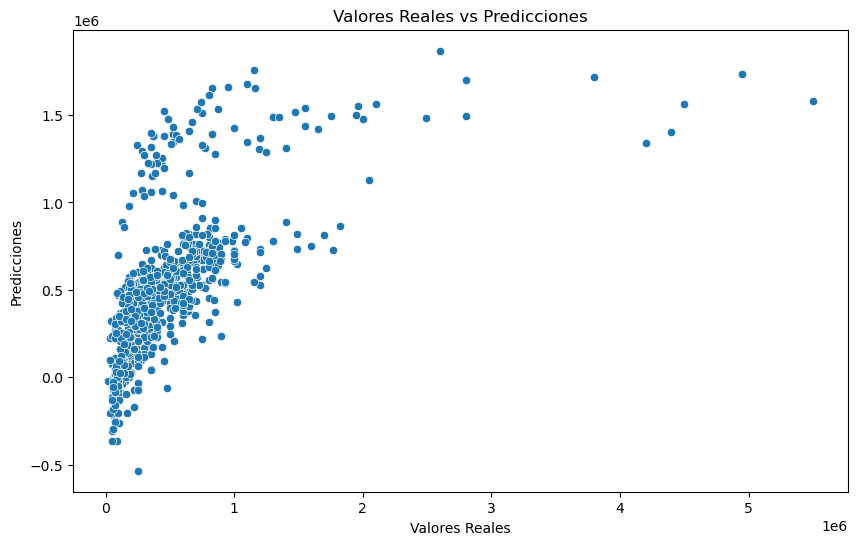

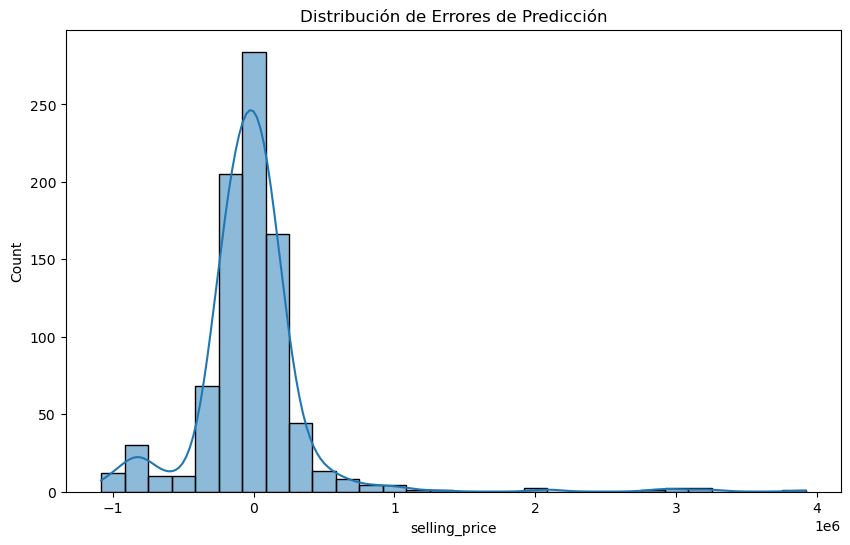

In [40]:
# Paso 7: Visualizar los Resultados del Modelo

# Gráfico de dispersión entre los valores predichos y los reales
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# Histograma de los errores de predicción
errores = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(errores, bins=30, kde=True)
plt.title('Distribución de Errores de Predicción')
plt.show()


In [ ]:
# Paso 8: Interpretar, Analizar y Documentar los Resultados

# El modelo de Regresión Lineal Múltiple muestra un R² de X en el conjunto de prueba,
# lo que indica que el modelo explica X% de la variabilidad en el precio de venta de los automóviles.
# La métrica RMSE es de X USD, lo que indica un error medio de predicción en ese rango.

# El coeficiente de la característica 'Car_Age' sugiere que, a medida que aumenta la edad del automóvil,
# su precio de venta disminuye, lo que es consistente con lo esperado.

# Se recomienda probar más características o ajustar hiperparámetros para mejorar la precisión del modelo.
